In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.dpi'] = 250

In [4]:
height = np.random.normal(140, 20, 1000)
weight = 0.5 * height + np.random.uniform(10, 20, 1000)

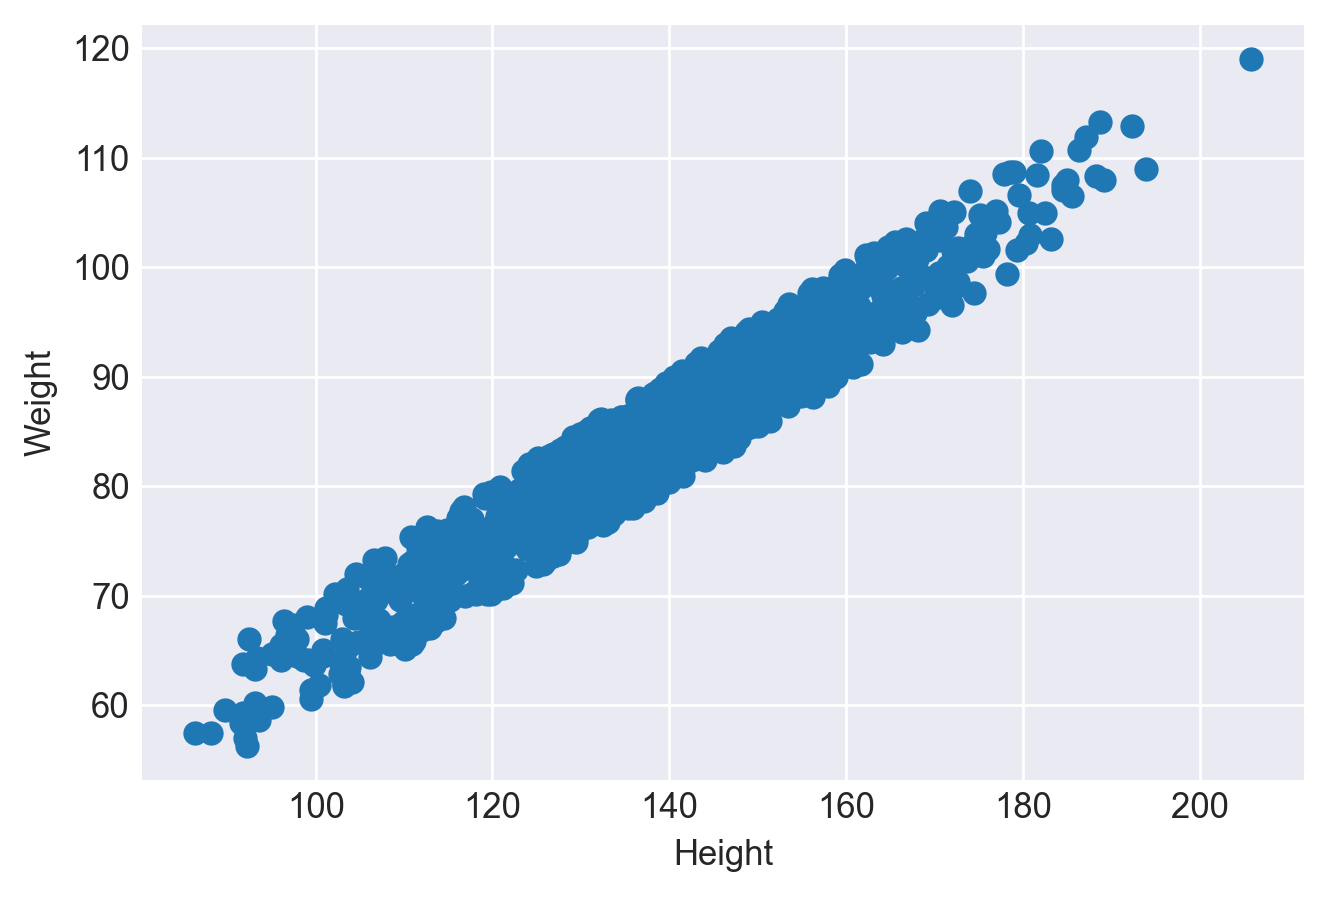

In [7]:
plt.scatter(height, weight)
plt.xlabel('Height')
plt.ylabel("Weight")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [13]:
height.shape

(1000,)

In [14]:
height = height.reshape(-1, 1)

In [15]:
height.shape

(1000, 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(height, weight)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = model.predict(X_test)

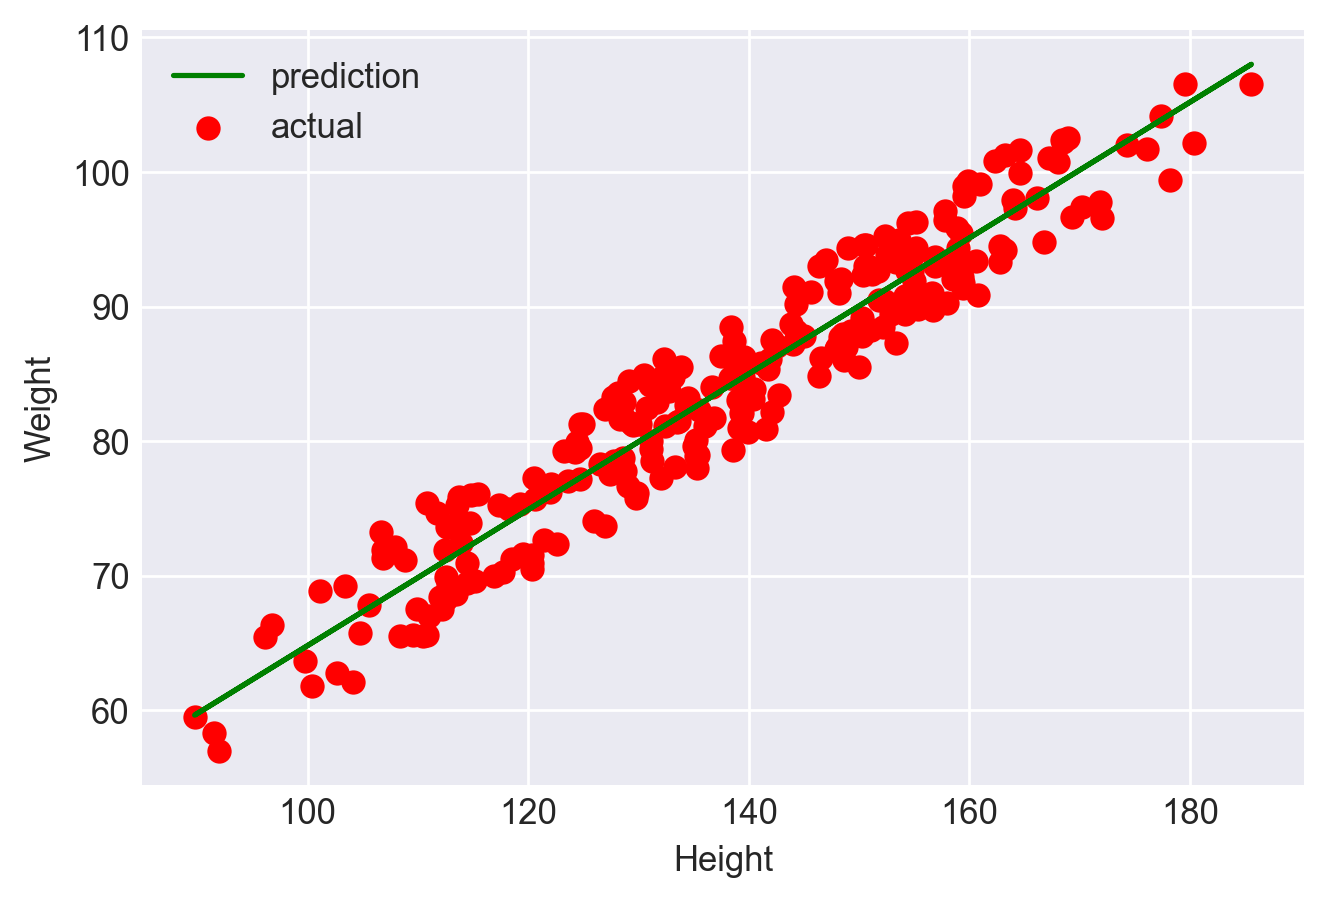

In [23]:
plt.scatter(X_test, y_test, color='r', label='actual')
plt.plot(X_test, y_pred, 'g', label='prediction')
plt.legend()
plt.xlabel('Height')
plt.ylabel("Weight")
plt.show()

In [24]:
model.coef_

array([0.50465784])

In [25]:
model.intercept_

14.348507149776921

In [29]:
print(f"{model.score(X_test, y_test)*100:.2f}")

92.54


In [30]:
from sklearn.metrics import mean_squared_error

In [35]:
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("RMS Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error :  8.08443708017142
RMS Error :  2.8433144532695325


In [33]:
from sklearn.metrics import mean_absolute_error
print("Absolute Error: ", mean_absolute_error(y_test, y_pred))

Absolute Error:  2.4806207389397588


`total sum of squares`
$$ TSS = \sum\limits_{i\to1}^N {(y_i - \bar  y )}^2 $$ 

`risidual Sum of squares`

$$RSS = \sum\limits_{i=1}^N {(\hat y_i - y_i)}^2 $$

$$ r2 \quad score \quad = \quad 1 - \frac {RSS} {TSS} $$

In [36]:
from sklearn.metrics import r2_score

In [37]:
print(f"Accuracy : {r2_score(y_test, y_pred)*100:.2f}")

Accuracy : 92.54


In [39]:
mpg = sns.load_dataset('mpg')

In [52]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [53]:
mpg.shape

(398, 9)

In [54]:
mpg.dropna(inplace=True)

In [55]:
mpg.shape

(392, 9)

In [56]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [57]:
features = mpg[['displacement', 'horsepower', 'weight']]

In [58]:
target = mpg['mpg']

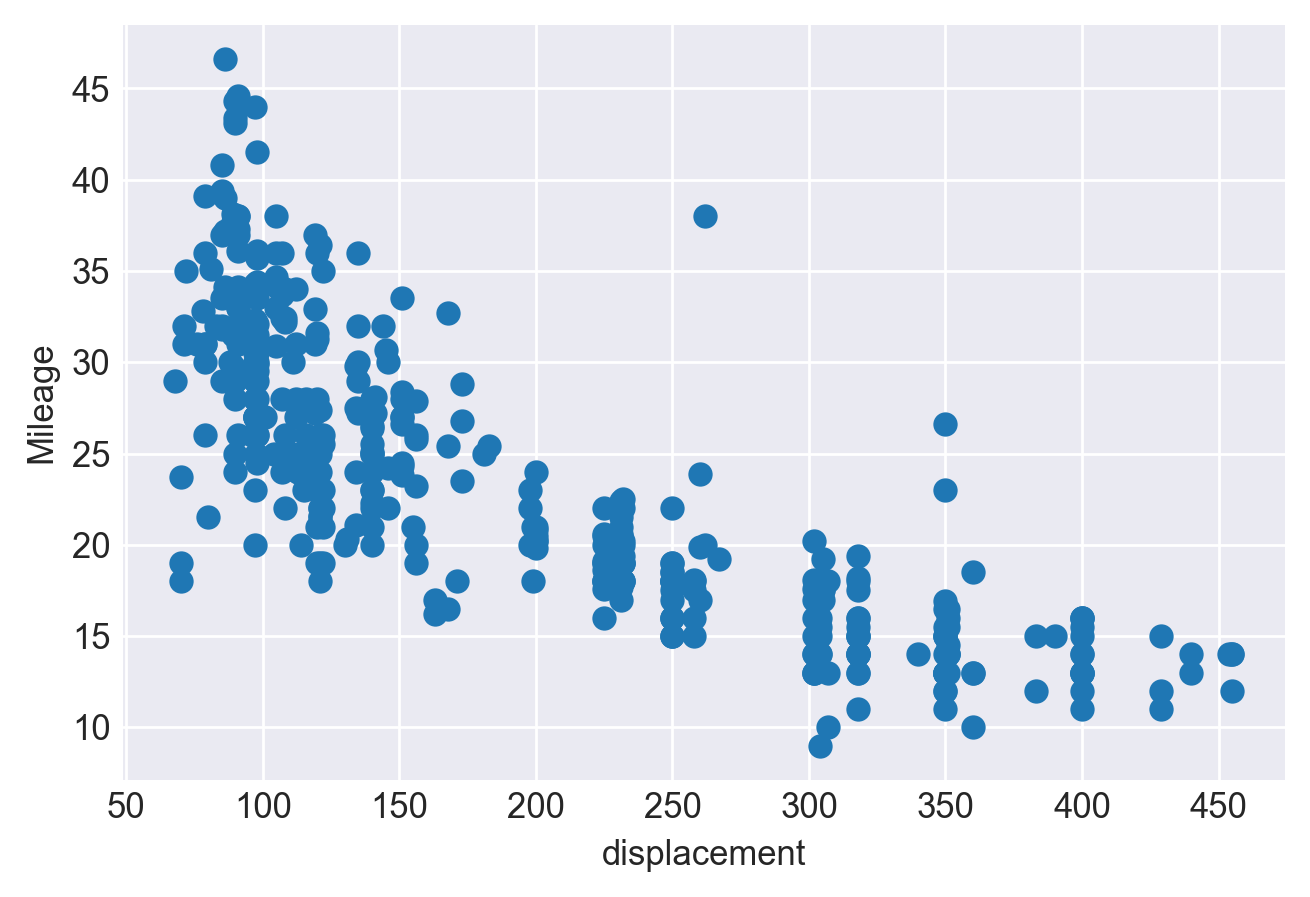

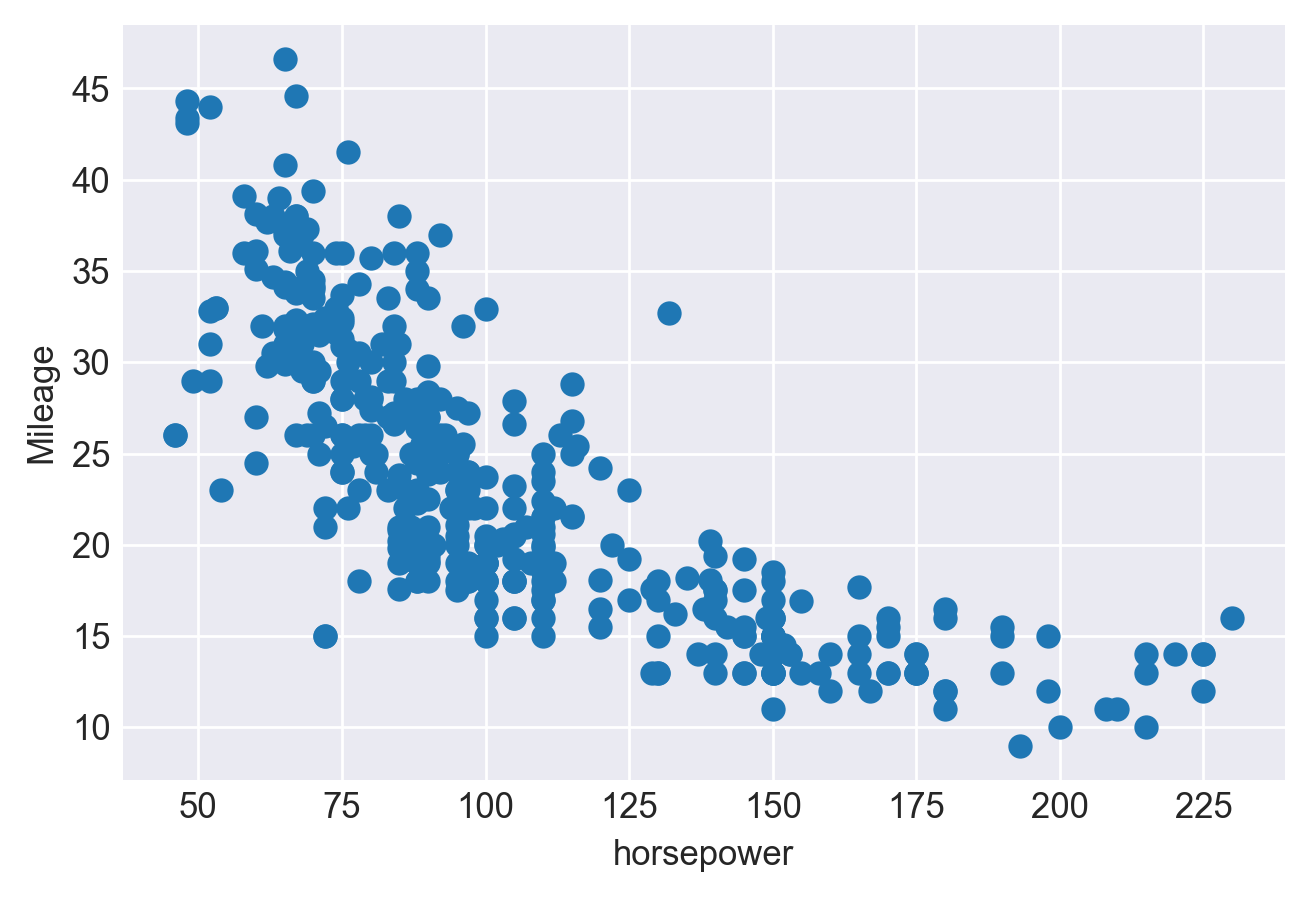

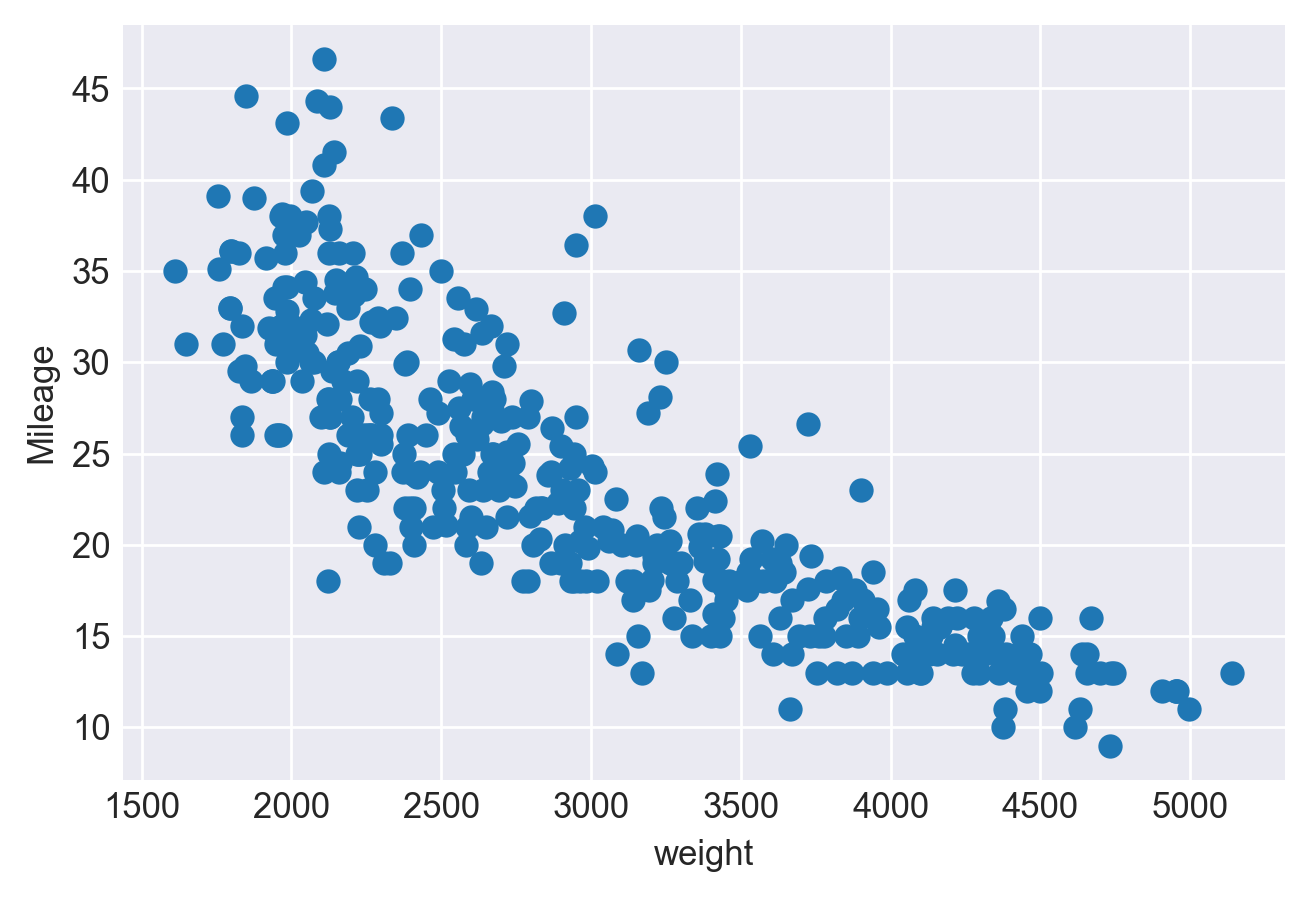

In [59]:
for col in features.columns:
    plt.scatter(features[col], target)
    plt.xlabel(col)
    plt.ylabel('Mileage')
    plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [68]:
model = LinearRegression()

In [69]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_pred = model.predict(X_test)

In [71]:
mean_absolute_error(y_test, y_pred)

3.4790861909952633

In [72]:
mean_squared_error(y_test, y_pred)

19.838601974717452

In [73]:
r2_score(y_test, y_pred)

0.6609808956801635

In [102]:
import pickle

### Saving our model for deployment

In [103]:
fp  = open('mpg_model.pkl', 'wa')
pickle.dump(model, fp)
fp.close()

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
x1 = features[['horsepower']]

In [81]:
m = PolynomialFeatures(degree=2)

In [83]:
f = m.fit_transform(x1)

In [85]:
f.shape

(392, 3)

In [89]:
f[:5]

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.4000e+02, 1.9600e+04]])

In [90]:
f = m.fit_transform(features)

In [91]:
f.shape

(392, 10)

In [93]:
m1 = LinearRegression()

In [95]:
m1.fit(f, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
p = m1.predict(f)

In [99]:
p.shape

(392,)

In [100]:
target.shape

(392,)

In [101]:
r2_score(target, p)

0.7594006796940088

In [104]:
features

,displacement,horsepower,weight
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449
...,...,...,...
393,140.0,86.0,2790
394,97.0,52.0,2130
395,135.0,84.0,2295
396,120.0,79.0,2625


In [109]:
model.predict([[307, 130,  3504]])

array([18.91328776])

In [108]:
X_train[:1].shape

(1, 3)